[![Binder](https://mybinder.org/badge_logo.svg)](https://github.com/Sistemas-Multimedia/MRVC/blob/master/src/image_IPP.ipynb)

# RD performance in IPP video coding

This notebook runs different IPP... experiments. The first one, implemented in `image_IPP.py` is a simple IPP... video codec without macro-blocks (MBs) MB-type RDO. All MBs are motion compensated as P-type blocks.  The second one, implemented in `image_IPP_adaptive.py`, is identical to `image_IPP.py`, but MB-type RDO is used (depending on the RD slope of the differerent MB types). S/P/I-type MBs are used. Finally, the RD curves are compared to MP4, using intra-mode.

In [1]:
!ln -sf ~/quantization/deadzone_quantizer.py .
!ln -sf ~/quantization/distortion.py .
!ln -sf ~/quantization/information.py .
!ln -sf ~/quantization/midtread_quantizer.py .

### Prepare the sequence

In [2]:
!rm /tmp/*.png

rm: no se puede borrar '/tmp/*.png': No existe el fichero o el directorio


In [3]:
N_frames = 5 # Min val 3

In [4]:
prefix = "https://media.xiph.org/video/derf/y4m/"
#sequence = "bus_cif.y4m"
sequence = "akiyo_cif.y4m"

In [5]:
#sequence = "stockholm_1280x768x50x420x578.avi"
#prefix = "http://www.hpca.ual.es/~vruiz/videos/"

In [6]:
!../sequences/extract_frames.sh -i $prefix -s $sequence -n $N_frames

input prefix = https://media.xiph.org/video/derf/y4m/
sequence file name = akiyo_cif.y4m
number of frames to extract = 5
/home/vruiz/MRVC/sequences/akiyo_cif.y4m exists. Only extracting ...
ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora -

## Testing `image_IPP`

### Select `image_IPP` codec in `config.py`
All MBs in P-frames are P-MBs.

In [7]:
!sed -z -i 's/\n#temporal_codec = "image_IPP"\n/\ntemporal_codec = "image_IPP"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "image_IPP_adaptive"\n/\n#temporal_codec = "image_IPP_adaptive"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "MP4"\n/\n#temporal_codec = "MP4"\n/g' config.py

In [8]:
!cat -n config.py | grep "temporal_codec" 

    28	temporal_codec = "image_IPP"
    29	#temporal_codec = "image_IPP_adaptive"
    30	#temporal_codec = "MP4"


### Select the spatial+entropy codec
We use MP4 and therefore, no previous spatial transform is used. MP4 uses the DCT.

In [9]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [10]:
!cat -n config.py | grep "transform" 

     6	#multiresolution_transform = "DWT"
     7	#multiresolution_transform = "LP"
     8	multiresolution_transform = None


### Select the color transform

In [11]:
!sed -z -i 's/\ncolor = "YCoCg"\n/\n#color = "YCoCg"\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg"\n/\n#color = "YCoCg"\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg"\n/\ncolor = "YCoCg"\n/g' config.py

In [12]:
!cat -n config.py | grep "color" 

    14	color = "YCoCg"
    15	#color = "YCrCb"
    16	#color = "RGB"


### Select the spatial codec

In [13]:
!sed -z -i 's/\nspatial_codec = "Q+PNG"\n/\n#spatial_codec = "Q+PNG"\n/g' config.py
!sed -z -i 's/\nspatial_codec = "H264"\n/\n#spatial_codec = "H264"\n/g' config.py
!sed -z -i 's/\n#spatial_codec = "DCT"\n/\nspatial_codec = "DCT"\n/g' config.py

In [14]:
!cat -n config.py | grep "spatial_codec" 

    10	#spatial_codec = "Q+PNG"
    11	#spatial_codec = "H264"
    12	spatial_codec = "DCT"


### Select quantization range

In [15]:
!sed -z -i 's/\nQ_steps = range(42, 21, -3)\n/\n#Q_steps = range(42, 21, -3)\n/g' config.py
!sed -z -i 's/\n#Q_steps = \[128, 64, 32, 16, 8\]\n/\nQ_steps = \[128, 64, 32, 16, 8\]\n/g' config.py

In [16]:
!cat -n config.py | grep "Q_steps" 

    22	#Q_steps = range(42, 21, -3)
    25	#Q_steps = [128]
    26	Q_steps = [128, 64, 32, 16, 8]


### Run the codec

!rm /tmp/*.png
!../sequences/$sequence/runme.sh

In [17]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 153 colors in palette
Input IDAT size = 2822 bytes
Input file size = 2879 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1708
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1708

Output IDAT size = 1708 bytes (1114 bytes decrease)
Output file size = 2236 bytes (643 bytes = 22.33% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 16 bits/pixel, grayscale
Error: Can't back up the existing output file

** Status report
1 file(s) have been processed.
1 error(s) have been encountered.
[im

** Processing: /tmp/original_motion_x_diff_comp_002.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_x_diff_comp_002.png is already optimized.

[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_diff_comp_003.png
** Processing: /tmp/original_motion_x_diff_comp_003.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_x_diff_comp_003.png is already opti

[image_IPP.py:387 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=4 Q_step=64
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_004.png
** Processing: /tmp/original_texture_004.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 4 bits/pixel, 6 colors in palette
Error: Can't back up the existing output file

** Status report
1 file(s) have been processed.
1 error(s) have been encountered.
[image_IPP.py:118 compute_br_DCT() INFO] height=288 width=352 n_channels=3 sequence_time=0.16666666666666666
[image_IPP.py:127 compute_br_DCT() DEBUG] cat /tmp/original_texture_???.png | gzip -9 > /tmp/image_IPP_texture.gz
[image_IPP.py:133 compute_br_DCT() INFO] texture: 5124 bytes, 245.952 KBPS, 0.026957070707070707 BPP
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_diff_comp_002.png
** Processing: /tmp/original_motion_y_diff_comp_002.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file 

                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 511

Output IDAT size = 511 bytes (646 bytes decrease)
Output file size = 601 bytes (613 bytes = 50.49% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.2449968159198761 -0.286998450756073
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_003.png
** Processing: /tmp/original_motion_x_003.png
22x18 pixels, 16 bits/pixel, grayscale
Input IDAT size = 24 bytes
Input file size = 81 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 20
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 20
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 20

Output IDAT size = 20 bytes (4 bytes decrease)
Output file size = 77 bytes (4 bytes = 4.94% decrease)

[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_003.png
** Processing: /tmp/original_motion_y_003.png
22x18 pixels, 16 bits


Output IDAT size = 13175 bytes (4313 bytes decrease)
Output file size = 13232 bytes (4337 bytes = 24.69% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 16 bits/pixel, grayscale
Error: Can't back up the existing output file

** Status report
1 file(s) have been processed.
1 error(s) have been encountered.
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_001.png
** Processing: /tmp/original_motion_y_001.png
22x18 pixels, 16 bits/pixel, grayscale
Input IDAT size = 24 bytes
Input file size = 81 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 20
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 20
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 20

Output IDAT size = 20 bytes (4 bytes decrease)
Outpu

[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Input IDAT size = 27974 bytes
Input file size = 28067 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 21825
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 21524
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 21175
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 21175

Output IDAT size = 21175 bytes (6799 bytes decrease)
Output file size = 21232 bytes (6835 bytes = 24.35% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 16 bits/pixel, grayscale
Error: Can't back up the existing output file

** Status report
1 file(s) hav

     1	Q_step: 128 BPP: 0.014683291245791246 KBPS: 133.968 Average AMSE: 227.55217671506733
     2	Q_step: 64 BPP: 0.02793560606060606 KBPS: 254.88 Average AMSE: 109.69377761994949
     3	Q_step: 32 BPP: 0.054540193602693604 KBPS: 497.616 Average AMSE: 47.69973826809764
     4	Q_step: 16 BPP: 0.10016308922558922 KBPS: 913.872 Average AMSE: 20.685074705387205
     5	Q_step: 8 BPP: 0.1861847643097643 KBPS: 1698.72 Average AMSE: 10.122535905934345


In [18]:
!grep BPP /tmp/output_image_IPP | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP.txt

In [19]:
!cat /tmp/image_IPP.txt

0.014683291245791246	227.55217671506733
0.02793560606060606	109.69377761994949
0.054540193602693604	47.69973826809764
0.10016308922558922	20.685074705387205
0.1861847643097643	10.122535905934345


In [20]:
RD_image_IPP = []
with open("/tmp/image_IPP.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP.append((float(rate), float(_distortion)))

## Testing `image_IPP_adaptive.py`
Now I-type MBs are allowed in P-frames.

### Select `image_IPP_adaptive` codec in `config.py`

In [21]:
!sed -z -i 's/\ntemporal_codec = "image_IPP"\n/\n#temporal_codec = "image_IPP"\n/g' config.py
!sed -z -i 's/\n#temporal_codec = "image_IPP_adaptive"\n/\ntemporal_codec = "image_IPP_adaptive"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "MP4"\n/\n#temporal_codec = "MP4"\n/g' config.py

In [22]:
!cat -n config.py | grep "temporal_codec" 

    28	#temporal_codec = "image_IPP"
    29	temporal_codec = "image_IPP_adaptive"
    30	#temporal_codec = "MP4"


In [23]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [24]:
!cat -n config.py | grep "transform" 

     6	#multiresolution_transform = "DWT"
     7	#multiresolution_transform = "LP"
     8	multiresolution_transform = None


In [25]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [26]:
!cat -n config.py | grep "color" 

    14	color = "YCoCg"
    15	#color = "YCrCb"
    16	#color = "RGB"


In [27]:
!sed -z -i 's/\nQ_steps = range(42, 21, -3)\n/\n#Q_steps = range(42, 21, -3)\n/g' config.py
!sed -z -i 's/\n#Q_steps = \[128, 64, 32, 16, 8\]\n/\nQ_steps = \[128, 64, 32, 16, 8\]\n/g' config.py

In [28]:
!cat -n config.py | grep "Q_steps" 

    22	#Q_steps = range(42, 21, -3)
    25	#Q_steps = [128]
    26	Q_steps = [128, 64, 32, 16, 8]


In [29]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_adaptive >&1) | grep BPP | grep Average | cat -n

[image_IPP_adaptive.py:48 encode() INFO] Running ...
[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 153 colors in palette
Input IDAT size = 2822 bytes
Input file size = 2879 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1708
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1708

Output IDAT size = 1708 bytes (1114 bytes decrease)
Output file size = 2236 bytes (643 bytes = 22.33% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 16 bits/pixel, grayscale
Error: Can't back up the existing output file

** Status report
1 file(s) have 

                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 290

Output IDAT size = 290 bytes (504 bytes decrease)
Output file size = 377 bytes (474 bytes = 55.70% decrease)

[image_3.py:51 _write() DEBUG] optipng /tmp/original_types_003.png
** Processing: /tmp/original_types_003.png
22x18 pixels, 3x8 bits/pixel, RGB
Reducing image to 2 bits/pixel, 3 colors in palette
Input IDAT size = 163 bytes
Input file size = 220 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 91
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 91

Output IDAT size = 91 bytes (72 bytes decrease)
Output file size = 169 bytes (51 bytes = 23.18% decrease)

[image_IPP.py:387 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=3 Q_step=128
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_003.png
** Processing: /tmp/original_texture_003.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 3

[image_IPP_adaptive.py:48 encode() INFO] Running ...
[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Input IDAT size = 5462 bytes
Input file size = 5519 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 4211
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 4204
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 4204

Output IDAT size = 4204 bytes (1258 bytes decrease)
Output file size = 4261 bytes (1258 bytes = 22.79% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 16 bits/pixel, grayscale
Error: Can't back up the existing output file

** Status report
1 file(s) have bee

[image_3.py:51 _write() DEBUG] optipng /tmp/original_types_003.png
** Processing: /tmp/original_types_003.png
22x18 pixels, 3x8 bits/pixel, RGB
Reducing image to 2 bits/pixel, 3 colors in palette
Input IDAT size = 164 bytes
Input file size = 221 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 87
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 87

Output IDAT size = 87 bytes (77 bytes decrease)
Output file size = 165 bytes (56 bytes = 25.34% decrease)

[image_IPP.py:387 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=3 Q_step=64
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_003.png
** Processing: /tmp/original_texture_003.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 38 colors in palette
Input IDAT size = 2160 bytes
Input file size = 2217 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1154
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 1152
                            

[image_IPP_adaptive.py:48 encode() INFO] Running ...
[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Input IDAT size = 10245 bytes
Input file size = 10314 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 7787
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 7733
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 7733

Output IDAT size = 7733 bytes (2512 bytes decrease)
Output file size = 7790 bytes (2524 bytes = 24.47% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 16 bits/pixel, grayscale
Error: Can't back up the existing output file

** Status report
1 file(s) have b

                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 765

Output IDAT size = 765 bytes (909 bytes decrease)
Output file size = 876 bytes (855 bytes = 49.39% decrease)

[image_3.py:51 _write() DEBUG] optipng /tmp/original_types_003.png
** Processing: /tmp/original_types_003.png
22x18 pixels, 3x8 bits/pixel, RGB
Reducing image to 2 bits/pixel, 3 colors in palette
Input IDAT size = 124 bytes
Input file size = 181 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 66
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 66

Output IDAT size = 66 bytes (58 bytes decrease)
Output file size = 144 bytes (37 bytes = 20.44% decrease)

[image_IPP.py:387 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=3 Q_step=32
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_003.png
** Processing: /tmp/original_texture_003.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 31

[image_IPP_adaptive.py:48 encode() INFO] Running ...
[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Input IDAT size = 17488 bytes
Input file size = 17569 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 13308
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 13175
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 13175

Output IDAT size = 13175 bytes (4313 bytes decrease)
Output file size = 13232 bytes (4337 bytes = 24.69% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 16 bits/pixel, grayscale
Error: Can't back up the existing output file

** Status report
1 file(s) h

[image_IPP.py:387 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=3 Q_step=16
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_003.png
** Processing: /tmp/original_texture_003.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 23 colors in palette
Input IDAT size = 3871 bytes
Input file size = 3928 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 2129
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 2109
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 2109

Output IDAT size = 2109 bytes (1762 bytes decrease)
Output file size = 2247 bytes (1681 bytes = 42.80% decrease)

[image_3.py:51 _write() DEBUG] optipng /tmp/original_types_003.png
** Processing: /tmp/original_types_003.png
22x18 pixels, 3x8 bits/pixel, RGB
Reducing image to 1 bit/pixel, 2 colors in palette
Input IDAT size = 36 bytes
Input file size = 93 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 20
  zc = 9  zm = 8  zs =

[image_IPP_adaptive.py:48 encode() INFO] Running ...
[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Input IDAT size = 27974 bytes
Input file size = 28067 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 21825
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 21524
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 21175
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 21175

Output IDAT size = 21175 bytes (6799 bytes decrease)
Output file size = 21232 bytes (6835 bytes = 24.35% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 16 bits/pixel, grayscale
Error: Can't back up the

[image_IPP.py:387 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=3 Q_step=8
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_003.png
** Processing: /tmp/original_texture_003.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 61 colors in palette
Input IDAT size = 7541 bytes
Input file size = 7598 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 4263
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 4257
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 4257

Output IDAT size = 4257 bytes (3284 bytes decrease)
Output file size = 4509 bytes (3089 bytes = 40.66% decrease)

[image_3.py:51 _write() DEBUG] optipng /tmp/original_types_003.png
** Processing: /tmp/original_types_003.png
22x18 pixels, 3x8 bits/pixel, RGB
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 28 bytes
Input file size = 85 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1

     1	Q_step: 128 BPP: 0.033049242424242425 KBPS: 301.536 Average AMSE: 224.47536168981478
     2	Q_step: 64 BPP: 0.050552398989898994 KBPS: 461.23199999999997 Average AMSE: 111.4984243476431
     3	Q_step: 32 BPP: 0.06742950336700337 KBPS: 615.216 Average AMSE: 50.4598866266835
     4	Q_step: 16 BPP: 0.07509995791245791 KBPS: 685.2 Average AMSE: 24.309997106481482
     5	Q_step: 8 BPP: 0.11666140572390572 KBPS: 1064.4 Average AMSE: 12.707933501683502


In [30]:
!grep BPP /tmp/output_image_IPP_adaptive | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_adaptive.txt

In [31]:
!cat /tmp/image_IPP_adaptive.txt

0.033049242424242425	224.47536168981478
0.050552398989898994	111.4984243476431
0.06742950336700337	50.4598866266835
0.07509995791245791	24.309997106481482
0.11666140572390572	12.707933501683502


In [32]:
RD_image_IPP_adaptive = []
with open("/tmp/image_IPP_adaptive.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_adaptive.append((float(rate), float(_distortion)))

## Testing MP4

### Select `MP4` codec in `config.py`

In [33]:
!sed -z -i 's/\ntemporal_codec = "image_IPP"\n/\n#temporal_codec = "image_IPP"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "image_IPP_adaptive"\n/\n#temporal_codec = "image_IPP_adaptive"\n/g' config.py
!sed -z -i 's/\n#temporal_codec = "MP4"\n/\ntemporal_codec = "MP4"\n/g' config.py

In [34]:
!cat -n config.py | grep "temporal_codec" 

    28	#temporal_codec = "image_IPP"
    29	#temporal_codec = "image_IPP_adaptive"
    30	temporal_codec = "MP4"


In [35]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [36]:
!cat -n config.py | grep "transform" 

     6	#multiresolution_transform = "DWT"
     7	#multiresolution_transform = "LP"
     8	multiresolution_transform = None


In [37]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [38]:
!cat -n config.py | grep "color" 

    14	color = "YCoCg"
    15	#color = "YCrCb"
    16	#color = "RGB"


In [39]:
!sed -z -i 's/\n#Q_steps = range(42, 21, -3)\n/\nQ_steps = range(42, 21, -3)\n/g' config.py
!sed -z -i 's/\nQ_steps = \[128, 64, 32, 16, 8\]\n/\n#Q_steps = \[128, 64, 32, 16, 8\]\n/g' config.py

In [40]:
!cat -n config.py | grep "Q_steps" 

    22	Q_steps = range(42, 21, -3)
    25	#Q_steps = [128]
    26	#Q_steps = [128, 64, 32, 16, 8]


In [41]:
!python RD_curve.py --N_frames=$N_frames 1> >(tee /tmp/output_MP4 >&1) | grep BPP | grep Average | cat -n

[MP4.py:25 encode() INFO] ffmpeg -start_number 0 -y -i /tmp/original_%03d.png -c:v libx264 -vf format=yuv444p -crf 42 -frames:v 5 -g 5 -bf 0 /tmp/output.mp4
ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidst

  libavutil      56. 70.100 / 56. 70.100
  libavcodec     58.134.100 / 58.134.100
  libavformat    58. 76.100 / 58. 76.100
  libavdevice    58. 13.100 / 58. 13.100
  libavfilter     7.110.100 /  7.110.100
  libswscale      5.  9.100 /  5.  9.100
  libswresample   3.  9.100 /  3.  9.100
  libpostproc    55.  9.100 / 55.  9.100
Input #0, image2, from '/tmp/original_%03d.png':
  Duration: 00:00:00.20, start: 0.000000, bitrate: N/A
  Stream #0:0: Video: png, rgb24(pc), 352x288 [SAR 128:117 DAR 1408:1053], 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55da605bb880] using SAR=128/117
[libx264 @ 0x55da605bb880] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55da605bb880] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x55da605bb880] 264 - core 163 r3060 5db6aa6 - H.264/MPEG-4 AVC codec - Copyleft 2003-2021 - http://www.videolan.org/x264.ht

ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid -

frame=    5 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.20 bitrate=N/A speed=10.1x    
video:522kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
[MP4.py:41 compute_br() INFO] height=288 width=352 n_channels=3 sequence_time=0.16666666666666666
[MP4.py:25 encode() INFO] ffmpeg -start_number 0 -y -i /tmp/original_%03d.png -c:v libx264 -vf format=yuv444p -crf 30 -frames:v 5 -g 5 -bf 0 /tmp/output.mp4
ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enabl

ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid -

frame=    5 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.20 bitrate=N/A speed=11.2x    
video:577kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
[MP4.py:41 compute_br() INFO] height=288 width=352 n_channels=3 sequence_time=0.16666666666666666
     1	Q_step: 42 BPP: 0.015019991582491583 KBPS: 137.04 Average AMSE: 114.36784511784512
     2	Q_step: 39 BPP: 0.016303661616161615 KBPS: 148.752 Average AMSE: 83.56751367845118
     3	Q_step: 36 BPP: 0.01875 KBPS: 171.072 Average AMSE: 58.18308606902357
     4	Q_step: 33 BPP: 0.022132786195286195 KBPS: 201.936 Average AMSE: 40.35029263994108
     5	Q_step: 30 BPP: 0.026557239057239057 KBPS: 242.304 Average AMSE: 28.018473800505053
     6	Q_step: 27 BPP: 0.03232323232323232 KBPS: 294.912 Average AMSE: 20.01470367739899
     7	Q_step: 24 BPP: 0.04041982323232323 KBPS: 368.784 Average AMSE: 14.271014178240742


In [42]:
!grep BPP /tmp/output_MP4 | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [43]:
!cat /tmp/MP4.txt

0.015019991582491583	114.36784511784512
0.016303661616161615	83.56751367845118
0.01875	58.18308606902357
0.022132786195286195	40.35029263994108
0.026557239057239057	28.018473800505053
0.03232323232323232	20.01470367739899
0.04041982323232323	14.271014178240742


In [44]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

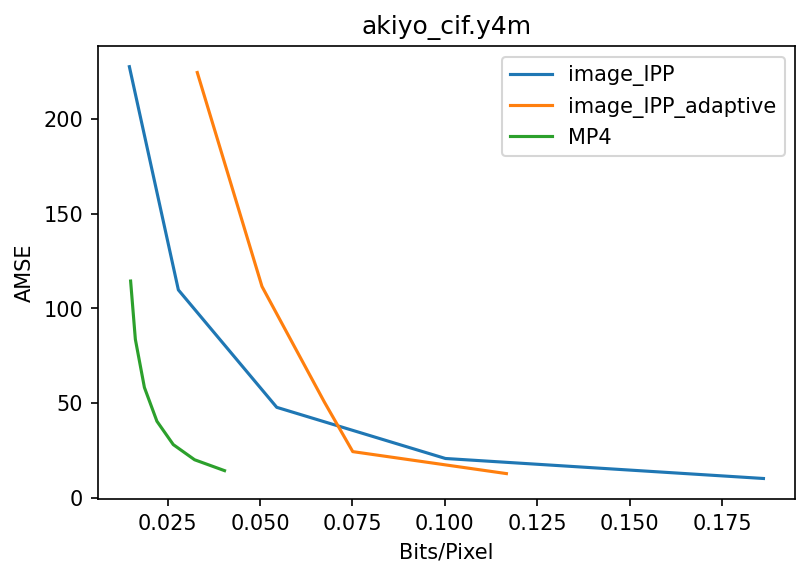

In [45]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
#pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

## Ignore the rest

## Testing `image_IPP_quantized_residue`

`image_IPP_quantized_residue.py` is a modification of `image_IPP.py` where the prediction-error images are quantized before they are compressed with MP4. Each macro-block is quantized to contribute with the same slope to the reconstructed macro-block. 


### Select `image_IPP_quantized_residue` in `RD_curve.py`

!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_quantized_residue as codec\n/\nimport image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [46]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	    import image_IPP as codec
    13	    import image_IPP_adaptive as codec
    15	    import MP4 as codec
    17	import logging
    27	import argparse


!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [47]:
!cat -n config.py | grep "transform" 

     6	#multiresolution_transform = "DWT"
     7	#multiresolution_transform = "LP"
     8	multiresolution_transform = None


!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [48]:
!cat -n config.py | grep "color" 

    14	color = "YCoCg"
    15	#color = "YCrCb"
    16	#color = "RGB"


In [49]:
# You can see in real-time the output by running "tail -f /tmp/output"
#!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_quantized_residue >&1) | grep BPP | grep Average | cat -n

In [50]:
!grep BPP /tmp/output_image_IPP_quantized_residue | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_quantized_residue.txt

In [51]:
!cat /tmp/image_IPP_quantized_residue.txt

In [52]:
RD_image_IPP_QR = []
with open("/tmp/image_IPP_quantized_residue.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_QR.append((float(rate), float(_distortion)))

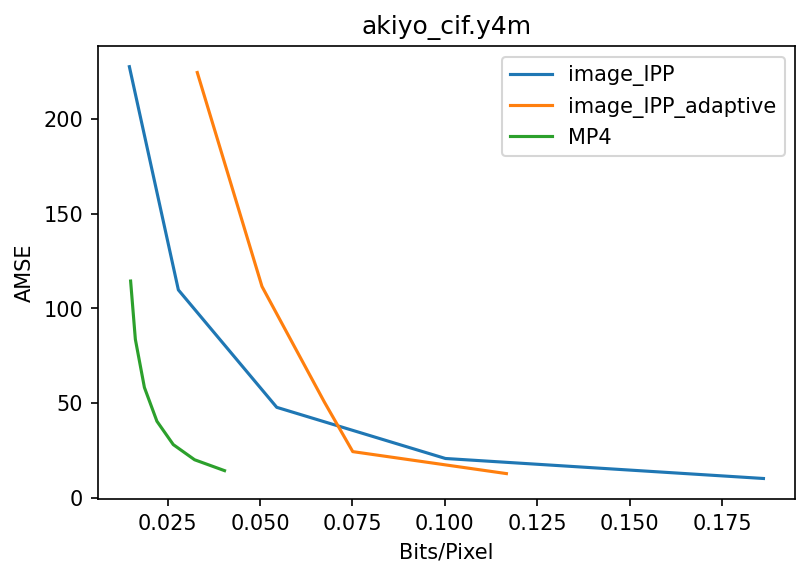

In [53]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

In [54]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

NameError: name 'RD_points_no_intrablocks' is not defined

<Figure size 900x600 with 0 Axes>